<a href="https://colab.research.google.com/github/SophonWongyai/AIDL/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance

ข้อมูลผลการเรียนของนักเรียนใน 3 วิชา เลข (Math) การอ่าน (Reading) และ การเขียน (Writing) ทุกวิชาคะแนนเต็มร้อย

### Data Description

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

**Variable Note**

parental level of education เรียงจากต่ำไปสูงคือ
1. some high school
2. high school
3. some college
4. associate's degree
5. bachelor's degree
6. master degree

### Objective:
**ให้สร้าง model ทำนายผลคะแนนเฉลี่ย และตอบคำถามต่อไปนี้**

- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเลขไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการอ่านไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการเขียนไหม?
- ปัจจัย 3 ลำดับแรกที่ส่งผลต่อคะแนนเฉลี่ยของนักเรียน?

##สมาชิกกลุ่ม
- 61050832 นางสาวณิชากร แพงาม
- 61050852 นางสาวปณิตา ประกอบแก้ว
- 61070363 นายโสภณ วงศ์ใหญ่
- 62010362 นายธนภัทร เนาถาวร

##Import Library

In [ ]:
# manage data
import pandas as pd
import numpy as np

# plot
import seaborn as sns
import matplotlib.pyplot as plt

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression

##Import Data

In [ ]:
!git clone https://github.com/SophonWongyai/AIDL

Cloning into 'AIDL'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 4), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


นำเข้าข้อมูลไฟล์ students_performance.csv

In [ ]:
data = pd.read_csv('/content/AIDL/Python for ML&DS/Mini Project/students_performance.csv')

# Data Understanding

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

อธิบายประเภทของข้อมูล
* Nominal
      gender, race/ethinicity, lunch, test preparation course
* Ordinal
      parental level of education
* Interval
      math score, reading score, writing score
* Ratio

## Basic Explore Data

ใช้ head(), shape, column, descibe(), info() เพื่อดูข้อมูลเบื้องต้น

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Rename
# data = data.rename(columns={'race/ethnicity':'race/ethinicity'})
# data.head(1)

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.389000,69.269000,68.154000
std,16.223714,15.143909,15.469182
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,229.000000,200.000000,160.000000


>พบว่า มีทั้งหมด 1000 rows 8 columns

* เป็น Categorical Data 5 columns ได้แก่ 
      gender, race/ethnicity, parental level of education, lunch, test preparation course, 
* เป็น Numerical Data 3 columns ได้แก่ 
      math score, reading score, writing score

## Check Value of Categorical Data

In [ ]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [ ]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

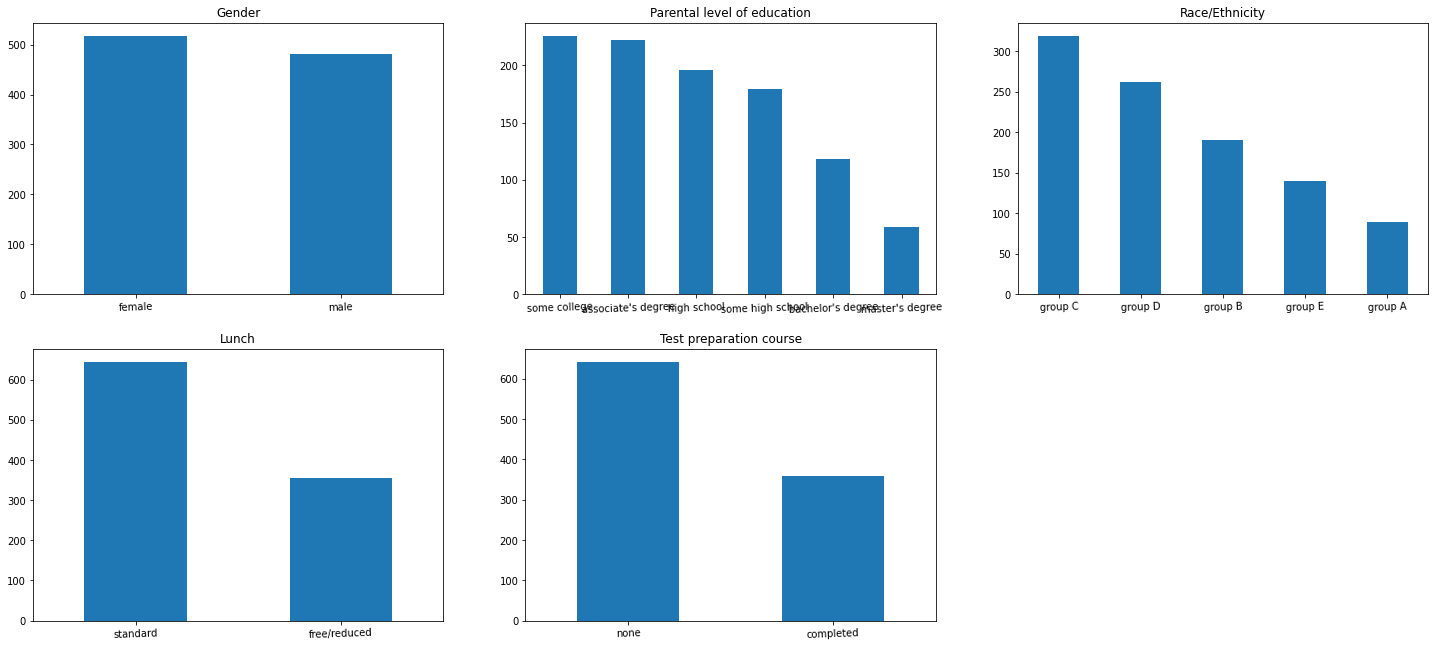

In [ ]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
data['gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
data['parental level of education'].value_counts(normalize=False).plot.bar(title= 'Parental level of education',rot=2) 
plt.subplot(233) 
data['race/ethnicity'].value_counts(normalize=False).plot.bar(title= 'Race/Ethnicity',rot=2)
plt.subplot(234) 
data['lunch'].value_counts(normalize=False).plot.bar(title= 'Lunch',rot=2)
plt.subplot(235) 
data['test preparation course'].value_counts(normalize=False).plot.bar(title= 'Test preparation course',rot=2)

##Check Value of Numerical Data

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.389000,69.269000,68.154000
std,16.223714,15.143909,15.469182
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,229.000000,200.000000,160.000000


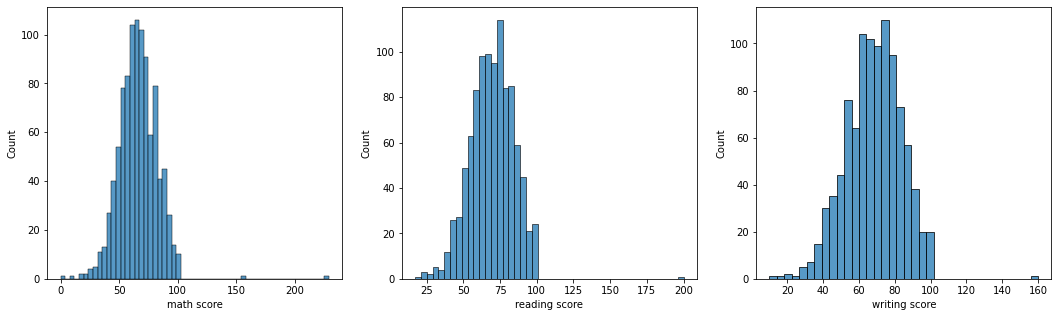

In [ ]:
# plot numerical data
plt.figure(figsize=(18,5))
plt.subplot(131) 
sns.histplot(data['math score'])
plt.subplot(132) 
sns.histplot(data['reading score'])
plt.subplot(133) 
sns.histplot(data['writing score'])

##Verify Data Quality
>ตรวจสอบคุณภาพ หรือ ความสมบูรณ์ ของข้อมูล

### Missing Data

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

>ไม่พบค่า null

“gender”, “parental level of education”, “race/ethnicity”, “lunch”, “test preparation course” are categorical variables.

“math score”, “read score”, “write score” contain numerical values and hence are numerical variables.

### Outliers

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

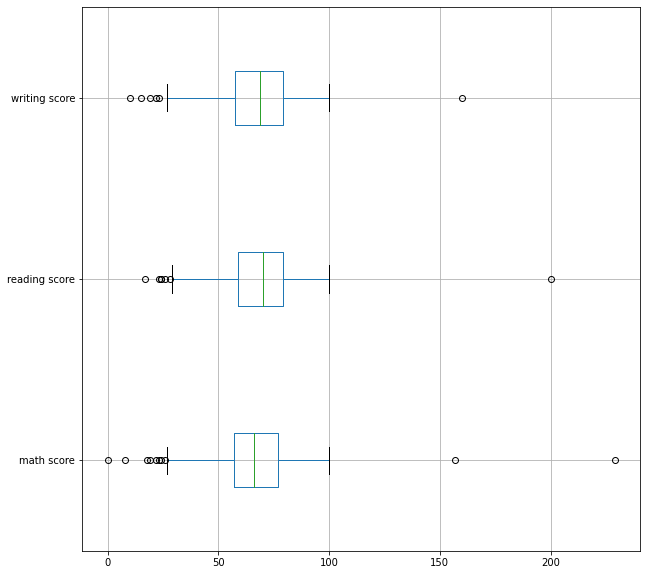

In [ ]:
#Check Outliers with Boxplot 
data.boxplot(vert=False, figsize=(10,10))

จาก Boxplot เกิด outlier ขึ้น
ทำให้เห็นว่าคะแนนเต็มแต่ละวิชาควรได้คะแนนมากที่สุด 100

# Data Preparetion

## Clean Data

In [ ]:
data.shape

(1000, 8)

### Clean Outliers

Clean Outliers at Interquartile Range > 100 score



In [ ]:
# math score > 100
print("math score > 100 : ",len(data[data["math score"]>100]))
# reading score > 100
print("reading score > 100 : ",len(data[data["reading score"]>100]))
# writing score > 100
print("writing score > 100 : ",len(data[data["writing score"]>100]))

math score > 100 :  2
reading score > 100 :  1
writing score > 100 :  1


###Drop data

In [ ]:
# drop case > 100
data[data["math score"] > 100].index
data.drop(data[data["math score"] > 100].index, inplace=True)

data[data["reading score"] > 100].index
data.drop(data[data["reading score"] > 100].index, inplace=True)

data[data["writing score"] > 100].index
data.drop(data[data["writing score"] > 100].index, inplace=True)

In [ ]:
data.shape

(996, 8)

## Average Score

In [ ]:
# Average Score
data['avg_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data[['avg_score']].head()

,avg_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58f977cc50>,
      dtype=object)

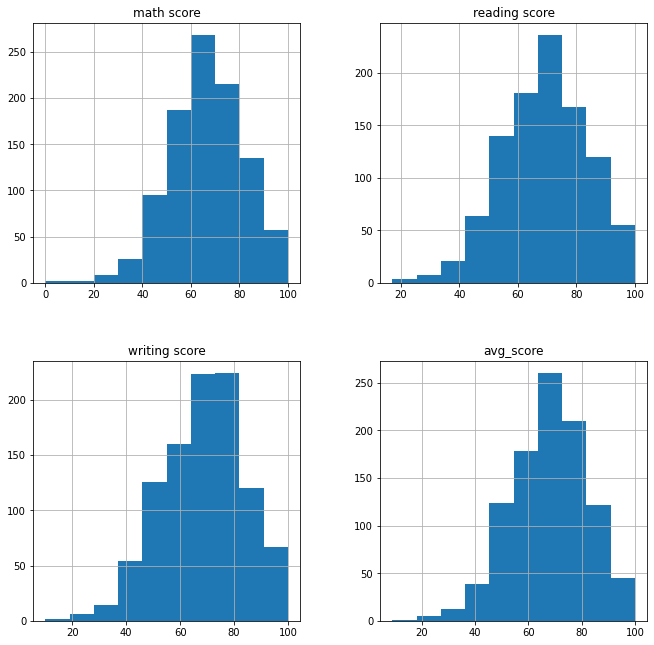

In [ ]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

##Distribution plot of the scores
Seaborn Distplot  tes

###Math Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


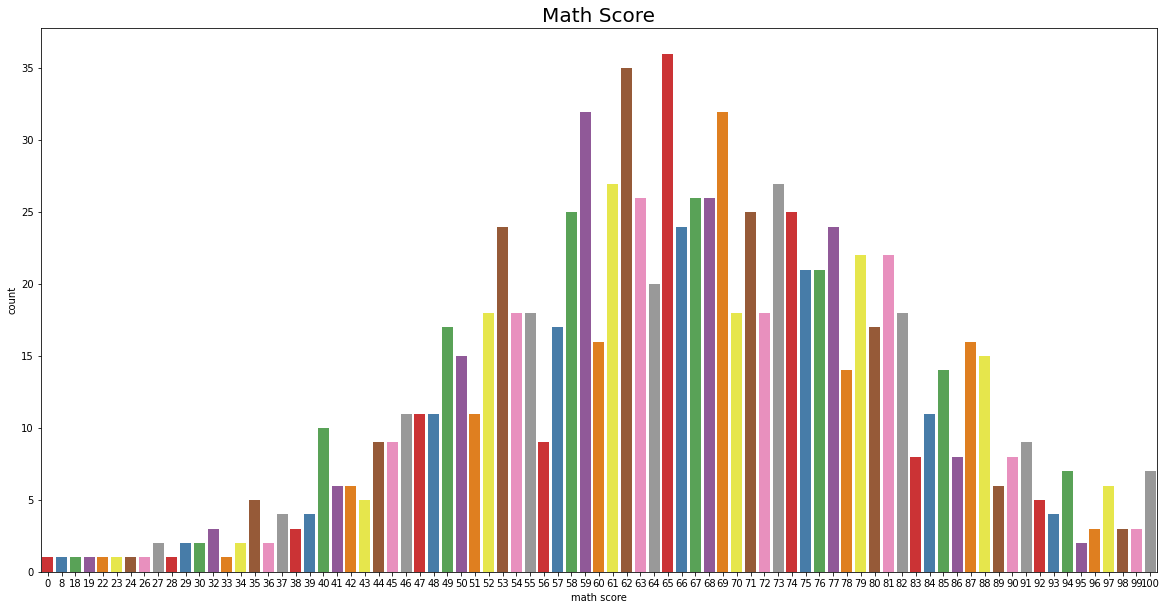

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['math score'], palette = 'Set1')
plt.title('Math Score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


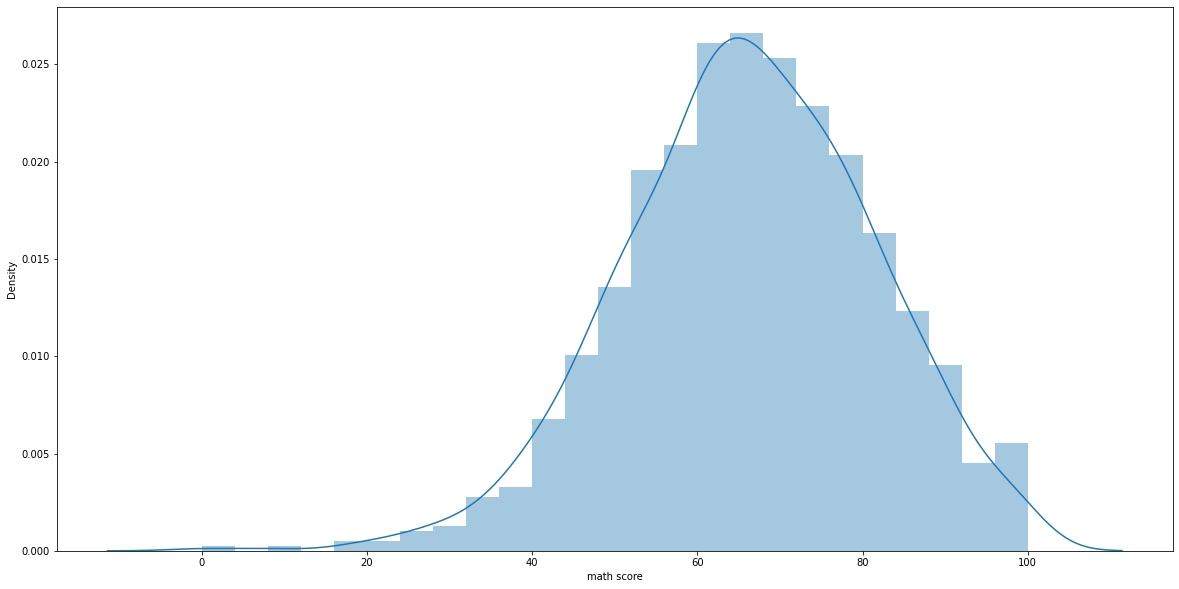

In [ ]:
sns.distplot(data['math score'])

###Reading Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


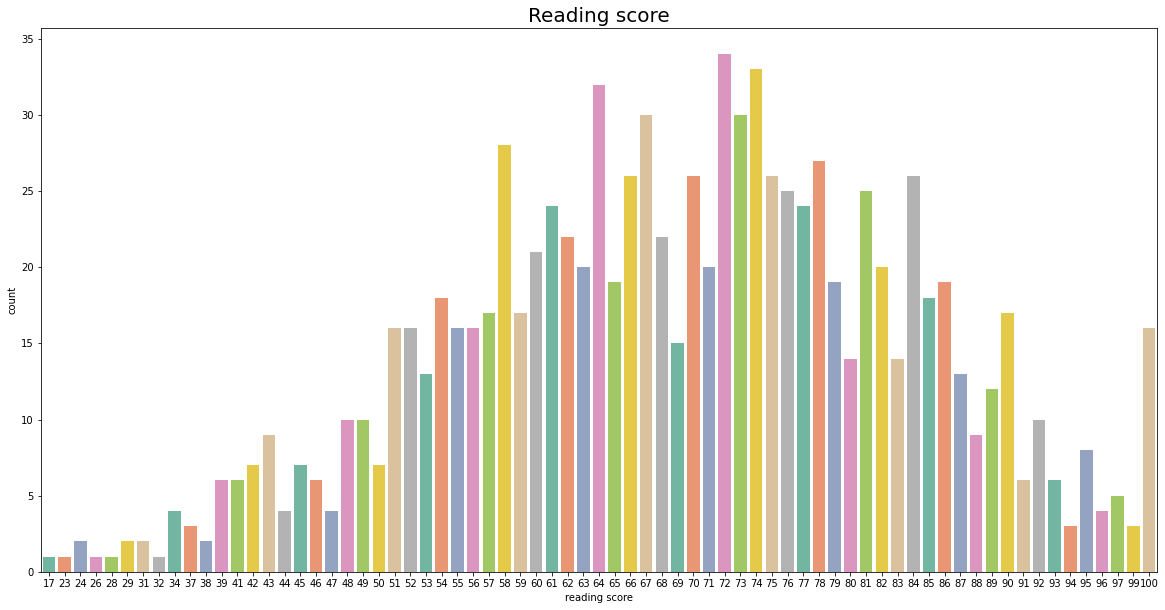

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['reading score'], palette = 'Set2')
plt.title('Reading score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


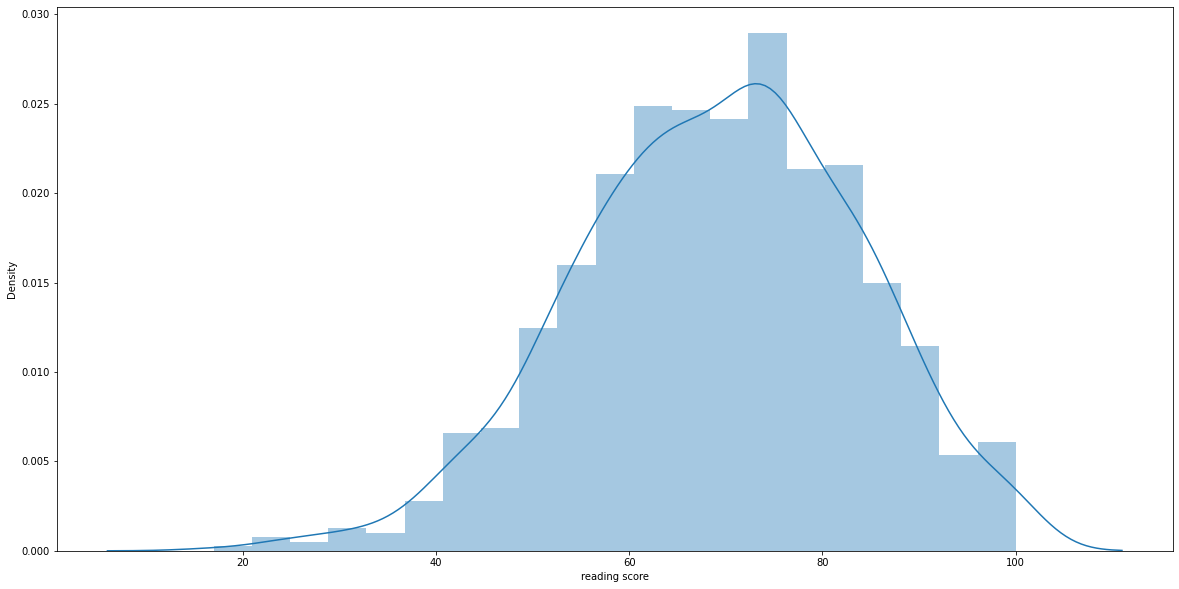

In [ ]:
sns.distplot(data['reading score'])

###Writing Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


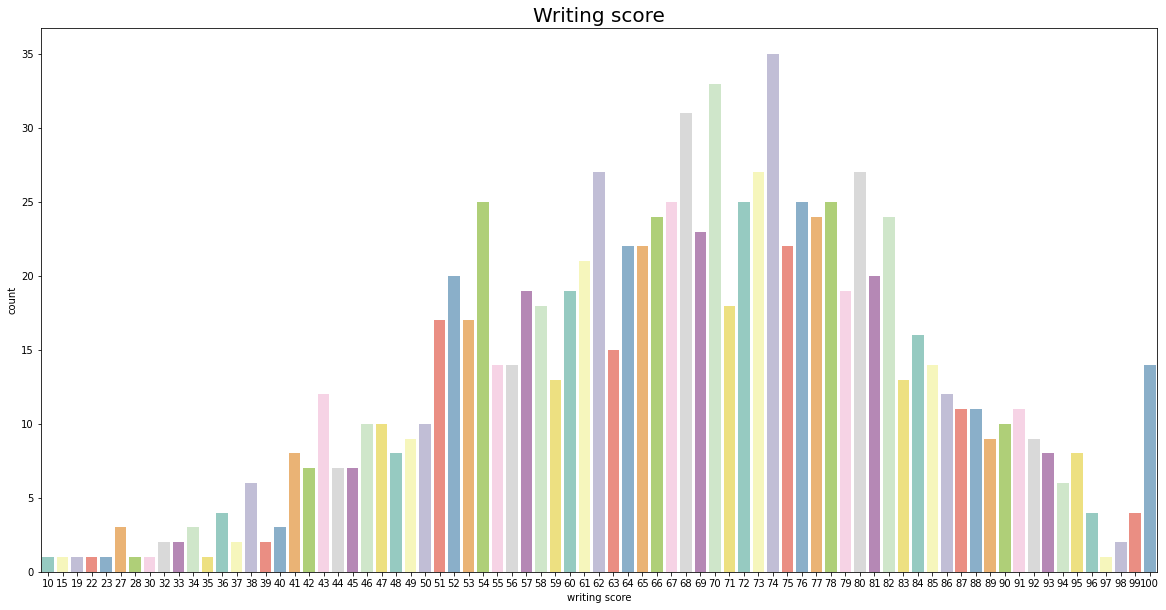

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['writing score'], palette = 'Set3')
plt.title('Writing score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


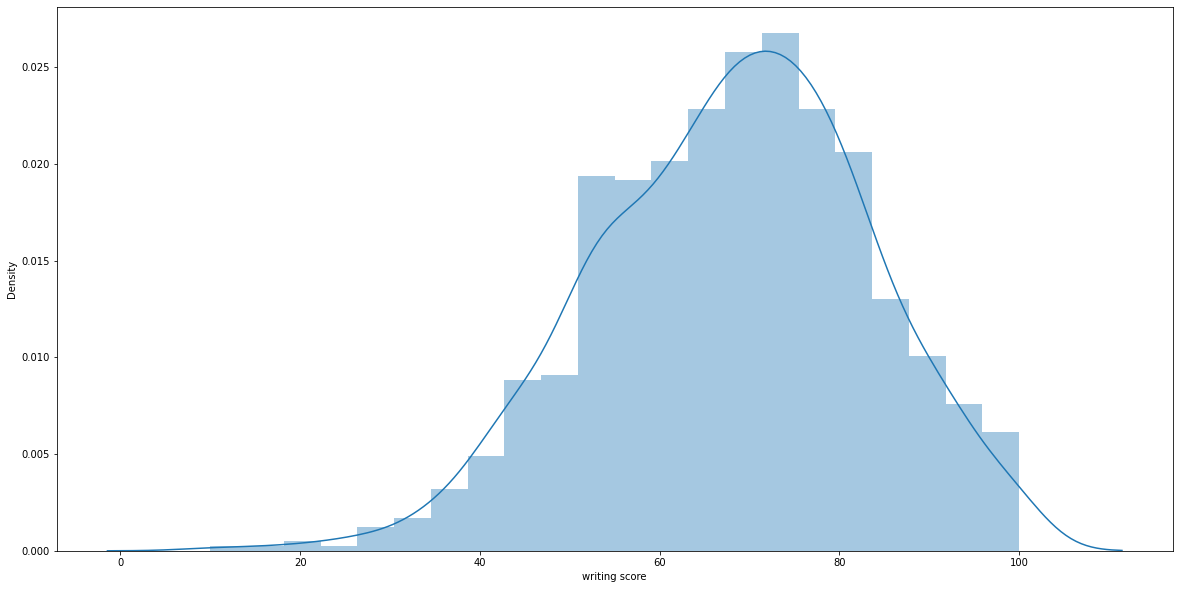

In [ ]:
sns.distplot(data['writing score'])

## Transform Categorical Data

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

In [ ]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
avg_score                      float64
dtype: object

เปลี่ยน type เป็น string

In [ ]:
data['parental level of education'] = data['parental level of education'].astype('str')

แปลงค่าเป็นค่าตัวเลข

In [ ]:
data['parental level of education'].replace(["some high school", "high school","some college", "associate's degree", "bachelor's degree", "master's degree"], [1, 2, 3, 4, 5, 6], inplace=True)

In [ ]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
205,male,group D,1,standard,completed,74,71,78,74.333333
23,female,group C,1,standard,none,69,73,73,71.666667
351,male,group E,3,standard,none,66,57,52,58.333333
338,female,group B,1,free/reduced,none,24,38,27,29.666667
261,male,group C,3,standard,completed,79,79,78,78.666667


## One Hot Encoding

เปลี่ยนข้อมูลใน column 
* Nominal
      gender, race/ethinicity, lunch, test preparation course

ให้เป็นในรูปแบบ one hot

### Change Nominal Data Type to String Type

In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_score'],
      dtype='object')

In [ ]:
data['gender'] = data['gender'].astype("str")
data['race/ethnicity'] = data['race/ethnicity'].astype("str")
data['lunch'] = data['lunch'].astype("str")
data['test preparation course'] = data['test preparation course'].astype("str")

### Do One Hot

In [ ]:
gender_onehot = pd.get_dummies(data['gender'], prefix='gender')
race_onehot = pd.get_dummies(data['race/ethnicity'], prefix='race')
lunch_onehot = pd.get_dummies(data['lunch'], prefix='lunch')
test_onehot = pd.get_dummies(data['test preparation course'], prefix='test')

### Show One Hot

In [ ]:
gender_onehot.head()

,gender_female,gender_male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
race_onehot.head()

,race_group A,race_group B,race_group C,race_group D,race_group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [ ]:
lunch_onehot.head()

,lunch_free/reduced,lunch_standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [ ]:
test_onehot.head()

,test_completed,test_none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


### Join One Hot Columns

In [ ]:
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,5,standard,none,72,72,74,72.666667


In [ ]:
data = pd.concat([data[data.columns[5:]], gender_onehot, race_onehot, data['parental level of education'], lunch_onehot, test_onehot], axis=1)
data.head()

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1
1,69,90,88,82.333333,1,0,0,0,1,0,0,3,0,1,1,0
2,90,95,93,92.666667,1,0,0,1,0,0,0,6,0,1,0,1
3,47,57,44,49.333333,0,1,1,0,0,0,0,4,1,0,0,1
4,76,78,75,76.333333,0,1,0,0,1,0,0,3,0,1,0,1


## Pair Plot

In [ ]:
data.columns

Index(['math score', 'reading score', 'writing score', 'avg_score',
       'gender_female', 'gender_male', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       'parental level of education', 'lunch_free/reduced', 'lunch_standard',
       'test_completed', 'test_none'],
      dtype='object')

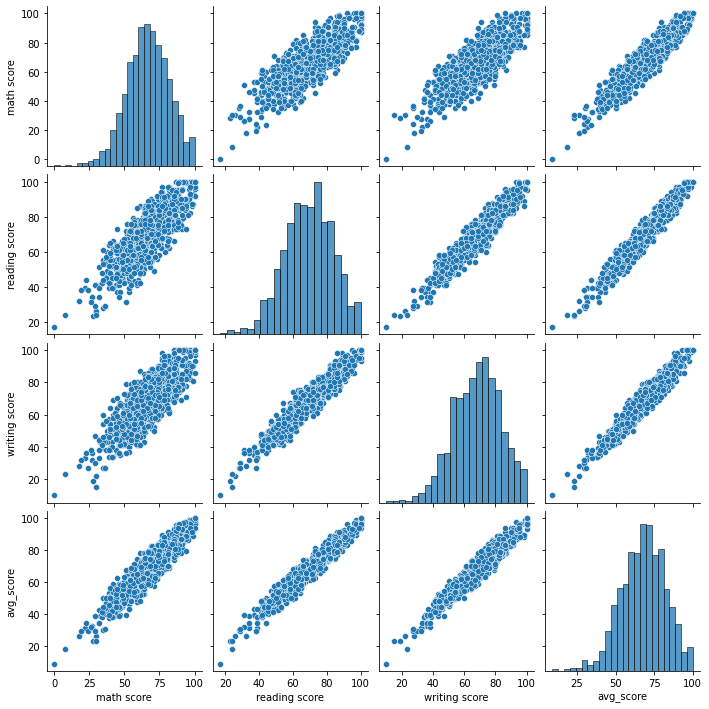

In [ ]:
sns.pairplot(data[['math score', 'reading score', 'writing score', 'avg_score']])

##Correlation

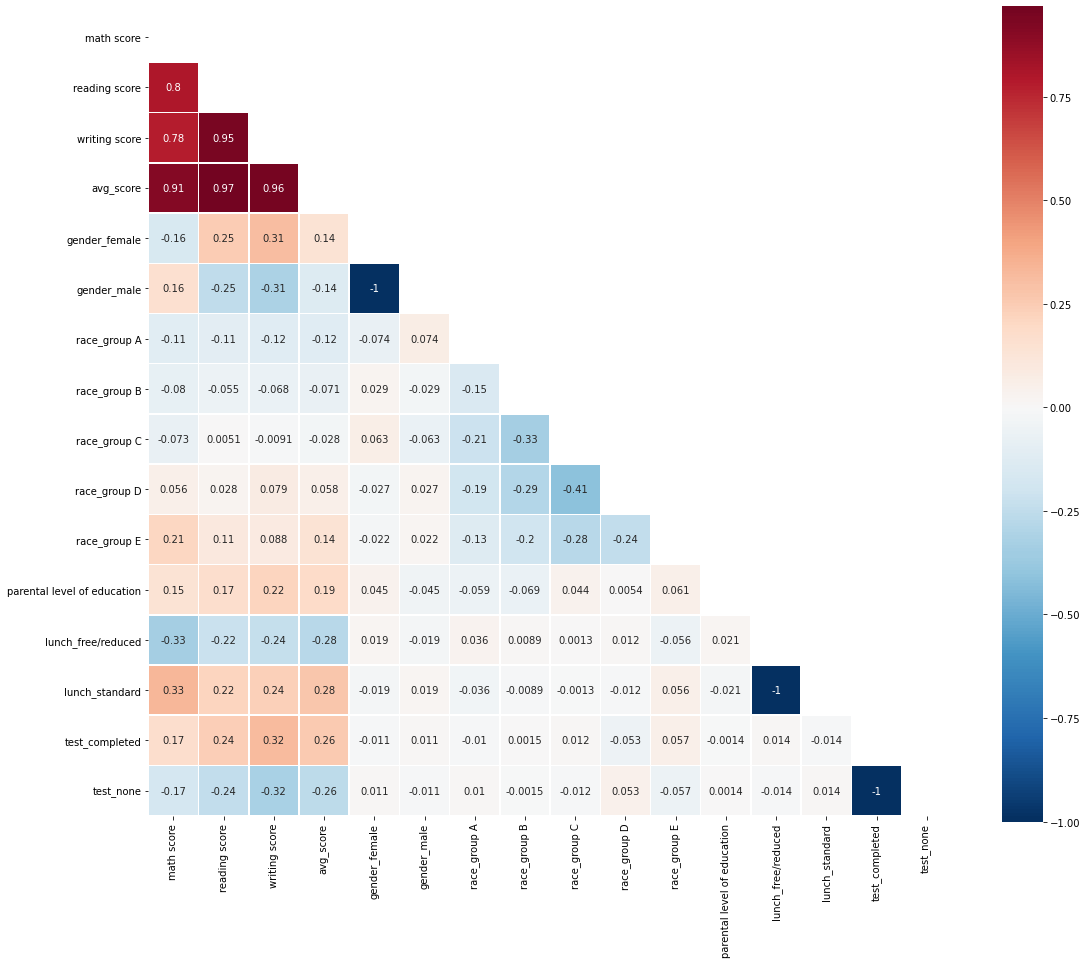

In [ ]:
corr = data.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu_r", center=0,
            square=True, linewidths=.5)

In [ ]:
# corrMatrix = data.corr()
# highCorr = corrMatrix[corrMatrix >= .8]
# sns.heatmap(highCorr, annot=True, cmap="Reds")
# plt.show()

In [ ]:
data.corr(method='spearman')

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
math score,1.000000,0.803420,0.778362,0.909086,-0.159459,0.159459,-0.110067,-0.079830,-0.073251,0.056088,0.208030,0.145164,-0.334300,0.334300,0.172400,-0.172400
reading score,0.803420,1.000000,0.948867,0.968462,0.248338,-0.248338,-0.105643,-0.054694,0.005147,0.027843,0.106278,0.173665,-0.217498,0.217498,0.243954,-0.243954
writing score,0.778362,0.948867,1.000000,0.959234,0.313137,-0.313137,-0.120329,-0.068010,-0.009122,0.078985,0.087700,0.222192,-0.237194,0.237194,0.317842,-0.317842
avg_score,0.909086,0.968462,0.959234,1.000000,0.138776,-0.138776,-0.120103,-0.071472,-0.027723,0.057617,0.143583,0.188334,-0.275295,0.275295,0.257389,-0.257389
gender_female,-0.159459,0.248338,0.313137,0.138776,1.000000,-1.000000,-0.074348,0.029440,0.062803,-0.027207,-0.022453,0.044502,0.018796,-0.018796,-0.010736,0.010736
gender_male,0.159459,-0.248338,-0.313137,-0.138776,-1.000000,1.000000,0.074348,-0.029440,-0.062803,0.027207,0.022453,-0.044502,-0.018796,0.018796,0.010736,-0.010736
race_group A,-0.110067,-0.105643,-0.120329,-0.120103,-0.074348,0.074348,1.000000,-0.151150,-0.213205,-0.185513,-0.125376,-0.059310,0.035583,-0.035583,-0.010086,0.010086
race_group B,-0.079830,-0.054694,-0.068010,-0.071472,0.029440,-0.029440,-0.151150,1.000000,-0.332513,-0.289325,-0.195536,-0.069277,0.008872,-0.008872,0.001489,-0.001489
race_group C,-0.073251,0.005147,-0.009122,-0.027723,0.062803,-0.062803,-0.213205,-0.332513,1.000000,-0.408108,-0.275814,0.044311,0.001329,-0.001329,0.011946,-0.011946
race_group D,0.056088,0.027843,0.078985,0.057617,-0.027207,0.027207,-0.185513,-0.289325,-0.408108,1.000000,-0.239990,0.005371,0.011918,-0.011918,-0.052567,0.052567


#Model (Multiple Regression)


## Fix X

In [ ]:
X = data[data.columns[4:]]

## Normalized Data
> ปรับค่าตัวแปรให้มีค่าอยู่ระหว่าง [0, 1]

<img src="https://miro.medium.com/max/229/0*Gy668nQfirqf6W4c">

In [ ]:
def normalize(X):
    
    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    X_norm = (X - X_min) / (X_max - X_min)

    return X_norm, X_max, X_min

In [ ]:
X_norm, X_max, X_min = normalize(X)

X_norm.head()

,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.6,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.4,0.0,1.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


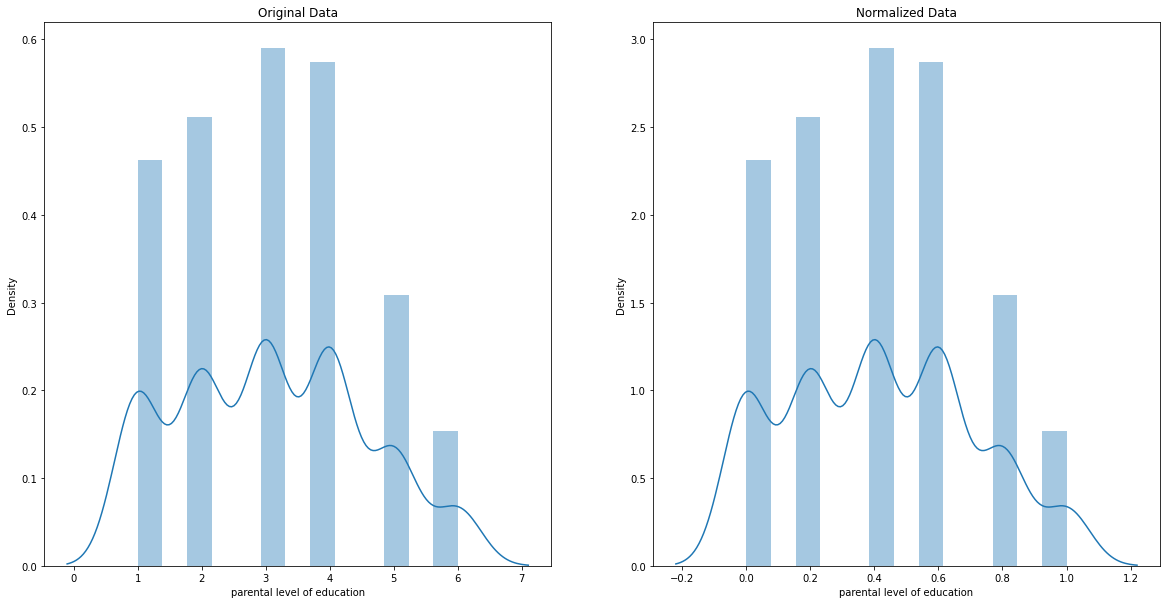

In [ ]:
# compare original data and normalized data
fig, ax=plt.subplots(1,2)

sns.distplot(X['parental level of education'], ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(X_norm['parental level of education'], ax=ax[1])
ax[1].set_title("Normalized Data")

plt.show()

In [ ]:
data.sample(5)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
800,67,73,68,69.333333,0,1,0,0,1,0,0,1,0,1,1,0
507,55,59,54,56.000000,0,1,0,1,0,0,0,5,1,0,0,1
408,52,57,56,55.000000,1,0,0,0,0,1,0,2,1,0,1,0
151,77,67,68,70.666667,0,1,1,0,0,0,0,5,0,1,0,1
134,74,79,75,76.000000,0,1,0,0,0,1,0,5,1,0,1,0


## Feature Selection Function

In [ ]:
# feature selection function
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train and test input data
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

## Math Score

### Fix y at math score

In [ ]:
y = data['math score']

### Train and Test Data

In [ ]:
data.head(1)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([ 1.01108791e+15,  1.01108791e+15, -1.43188345e+14, -1.43188345e+14,
       -1.43188345e+14, -1.43188345e+14, -1.43188345e+14,  1.79687500e+00,
        7.85216742e+13,  7.85216742e+13, -1.33688266e+13, -1.33688266e+13])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender_female,1.011088e+15
gender_male,1.011088e+15
race_group A,-1.431883e+14
race_group B,-1.431883e+14
race_group C,-1.431883e+14
race_group D,-1.431883e+14
race_group E,-1.431883e+14
parental level of education,1.796875e+00
lunch_free/reduced,7.852167e+13
lunch_standard,7.852167e+13


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([56.625, 61.25 , 59.875, 64.625, 71.375, 71.75 , 60.625, 69.25 ,
       63.5  , 68.875, 78.125, 65.125, 72.375, 72.75 , 72.875, 70.875,
       74.125, 60.625, 68.125, 59.375, 71.   , 56.5  , 78.5  , 78.5  ,
       59.125, 75.25 , 56.5  , 80.25 , 68.25 , 62.75 , 69.25 , 65.25 ,
       71.75 , 64.5  , 64.125, 65.625, 58.75 , 66.375, 58.875, 71.5  ,
       74.5  , 70.875, 65.25 , 66.25 , 73.375, 76.375, 69.25 , 73.375,
       63.   , 64.5  , 77.   , 74.125, 56.5  , 73.125, 56.625, 52.375,
       68.125, 53.   , 67.25 , 69.875, 68.   , 64.5  , 68.75 , 59.5  ,
       80.25 , 65.25 , 52.875, 74.875, 61.625, 71.625, 58.75 , 66.125,
       59.875, 71.625, 66.875, 67.125, 67.5  , 75.25 , 60.125, 76.5  ,
       62.875, 57.625, 70.875, 54.125, 62.25 , 60.   , 59.375, 68.25 ,
       51.25 , 60.625, 68.25 , 60.5  , 76.75 , 49.375, 68.25 , 72.75 ,
       73.5  , 59.125, 71.625, 66.5  , 61.875, 63.5  , 61.25 , 61.   ,
       66.25 , 68.75 , 67.5  , 67.125, 82.125, 62.   , 80.25 , 68.25 ,
      

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

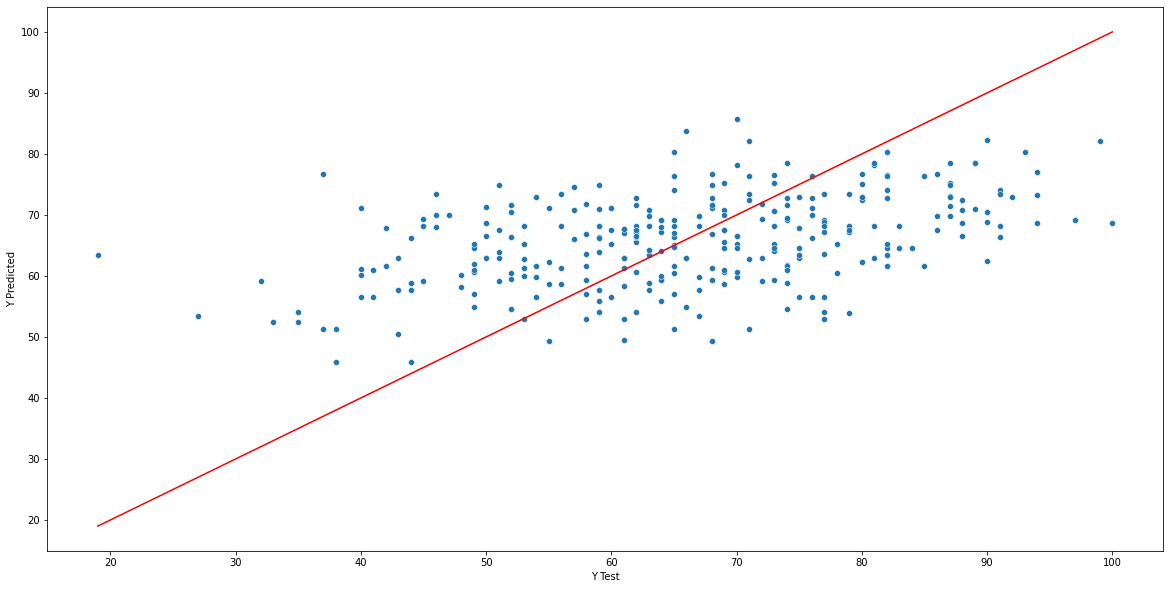

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 10.687290969899665
Mean Square Error: 170.6715091973244
Root Mean Square Error : 13.064130633047283


In [ ]:
y.describe()

count    996.000000
mean      66.104418
std       15.122121
min        0.000000
25%       57.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.1962601578259976


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean       0.260033
std       13.083439
min      -44.500000
25%       -8.187500
50%        1.125000
75%        9.312500
max       31.250000
Name: math score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


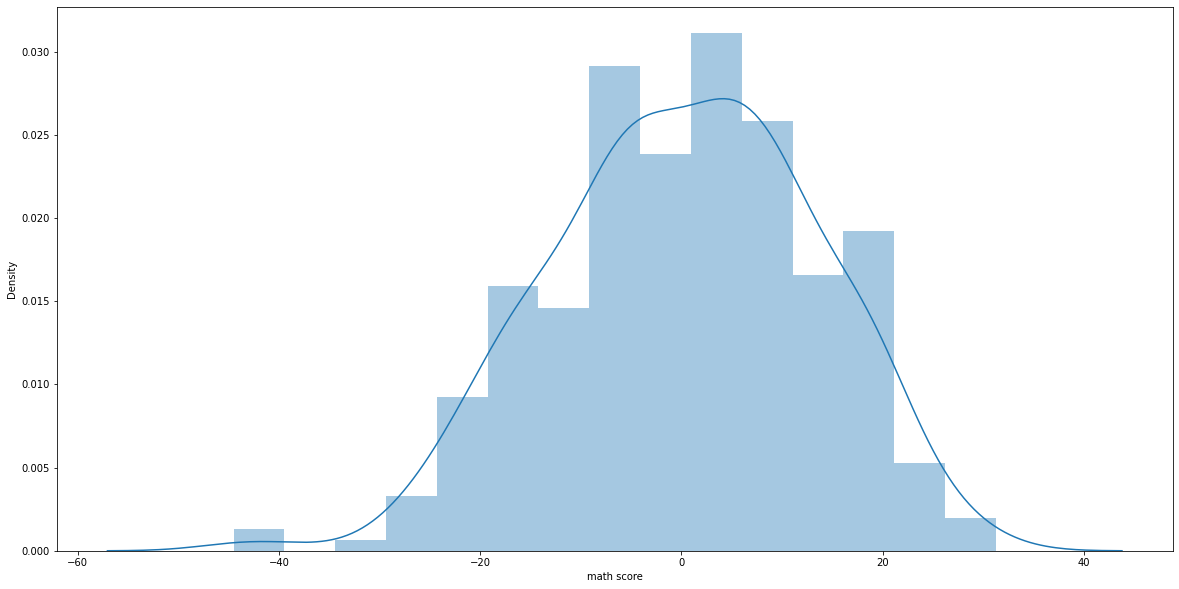

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1
1,69,90,88,82.333333,1,0,0,0,1,0,0,3,0,1,1,0
2,90,95,93,92.666667,1,0,0,1,0,0,0,6,0,1,0,1
3,47,57,44,49.333333,0,1,1,0,0,0,0,4,1,0,0,1
4,76,78,75,76.333333,0,1,0,0,1,0,0,3,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 23.804687
Feature 1: 23.804687
Feature 2: 10.639933
Feature 3: 7.470097
Feature 4: 2.730696
Feature 5: 1.510972
Feature 6: 45.319845
Feature 7: 24.603619
Feature 8: 94.051190
Feature 9: 94.051190
Feature 10: 22.700796
Feature 11: 22.700796


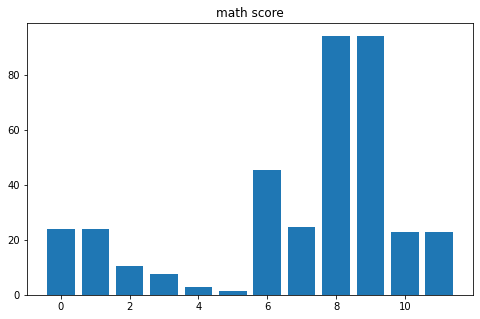

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('math score')
plt.show()
plt.savefig('math_score.png')

In [ ]:
data.head(1)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1


> Feature ที่ส่งผลต่อ Math Score คือ lunch , race_group E และ test preparation course 

## Reading Score

### Fix y at reading score

In [ ]:
y = data['reading score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([ 8.71850386e+14,  8.71850386e+14, -1.23469793e+14, -1.23469793e+14,
       -1.23469793e+14, -1.23469793e+14, -1.23469793e+14,  1.67187500e+00,
        6.77084076e+13,  6.77084076e+13, -1.15277975e+13, -1.15277975e+13])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender_female,8.718504e+14
gender_male,8.718504e+14
race_group A,-1.234698e+14
race_group B,-1.234698e+14
race_group C,-1.234698e+14
race_group D,-1.234698e+14
race_group E,-1.234698e+14
parental level of education,1.671875e+00
lunch_free/reduced,6.770841e+13
lunch_standard,6.770841e+13


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([54.625, 60.   , 67.   , 72.5  , 75.125, 69.25 , 58.25 , 75.75 ,
       70.375, 63.25 , 74.125, 74.25 , 68.875, 69.125, 79.125, 79.75 ,
       70.5  , 58.25 , 74.875, 58.375, 77.5  , 66.75 , 71.875, 71.875,
       66.5  , 72.625, 69.   , 85.75 , 63.625, 69.875, 75.75 , 72.125,
       67.   , 71.625, 63.875, 72.5  , 68.875, 74.125, 56.625, 68.25 ,
       83.   , 79.75 , 59.875, 76.375, 70.   , 72.5  , 75.75 , 70.   ,
       61.625, 60.25 , 74.25 , 70.5  , 66.75 , 76.875, 54.625, 63.875,
       74.875, 63.5  , 63.375, 79.75 , 62.75 , 60.25 , 65.5  , 70.5  ,
       85.75 , 72.125, 67.5  , 78.5  , 72.75 , 81.375, 68.875, 75.5  ,
       68.875, 81.375, 76.   , 61.625, 74.125, 84.75 , 57.875, 70.25 ,
       70.75 , 71.125, 79.75 , 65.5  , 62.125, 56.625, 72.75 , 63.625,
       63.625, 58.25 , 63.625, 70.5  , 68.   , 49.625, 68.875, 81.375,
       83.   , 66.5  , 81.375, 62.   , 61.875, 70.375, 74.375, 68.25 ,
       76.375, 77.625, 61.875, 61.625, 87.375, 59.625, 85.75 , 68.875,
      

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

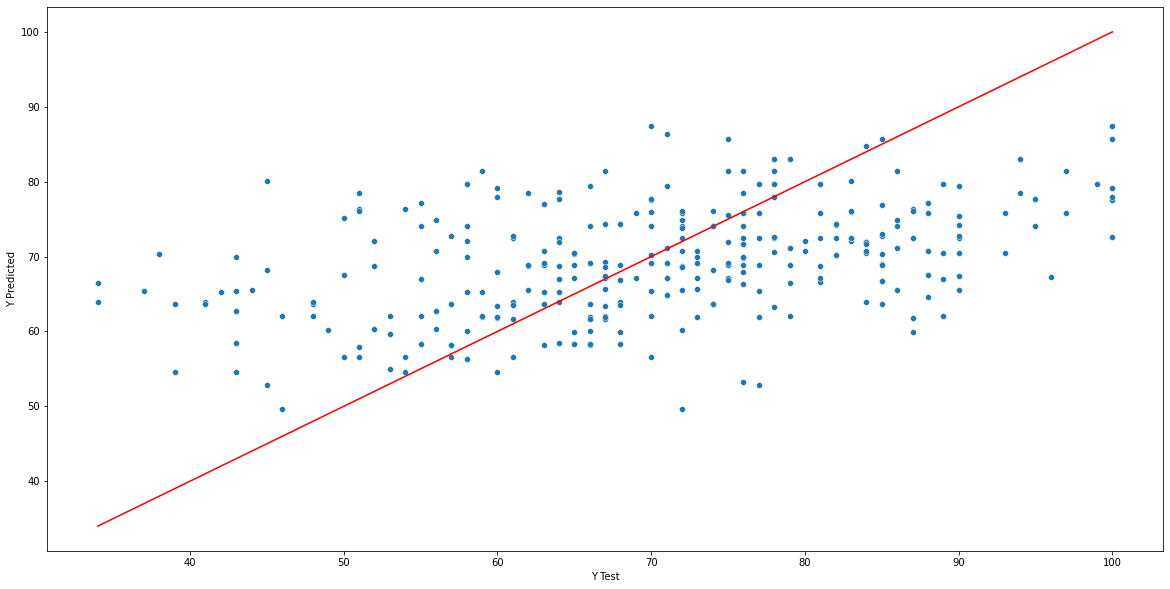

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 10.272993311036789
Mean Square Error: 165.77346362876253
Root Mean Square Error : 12.87530440916884


In [ ]:
y.describe()

count    996.000000
mean      69.171687
std       14.567108
min       17.000000
25%       59.000000
50%       70.000000
75%       79.000000
max      100.000000
Name: reading score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.1845293286532066


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean       0.985368
std       12.859065
min      -35.125000
25%       -6.625000
50%        1.250000
75%       10.375000
max       28.750000
Name: reading score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


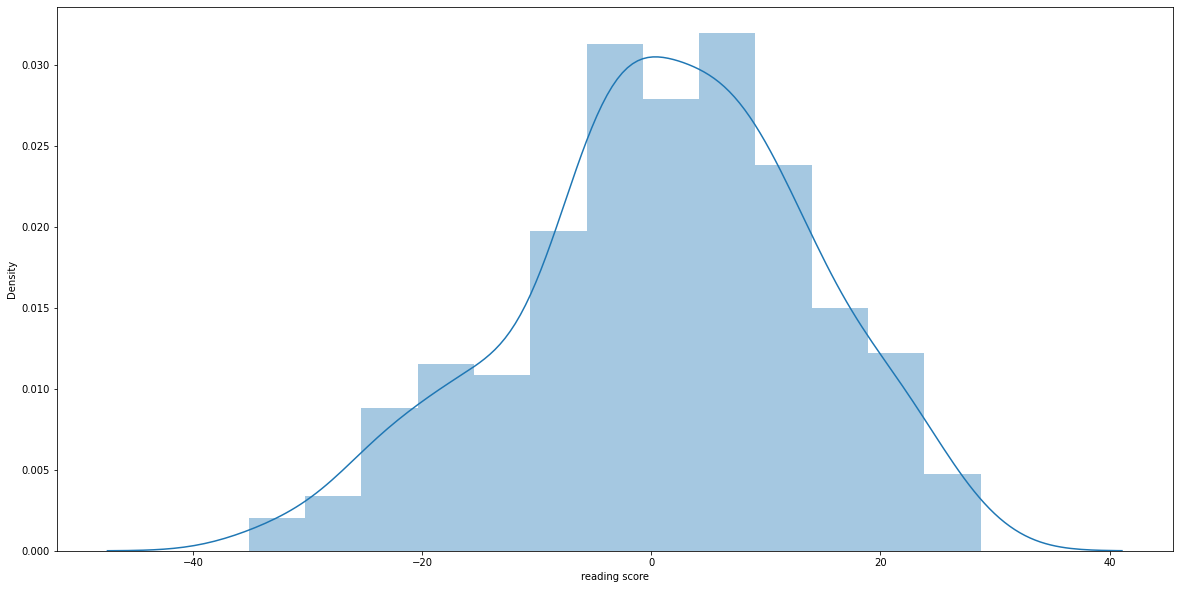

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1
1,69,90,88,82.333333,1,0,0,0,1,0,0,3,0,1,1,0
2,90,95,93,92.666667,1,0,0,1,0,0,0,6,0,1,0,1
3,47,57,44,49.333333,0,1,1,0,0,0,0,4,1,0,0,1
4,76,78,75,76.333333,0,1,0,0,1,0,0,3,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 43.555732
Feature 1: 43.555732
Feature 2: 11.882281
Feature 3: 5.928081
Feature 4: 0.198856
Feature 5: 0.990798
Feature 6: 14.716239
Feature 7: 30.217567
Feature 8: 36.496552
Feature 9: 36.496552
Feature 10: 41.847497
Feature 11: 41.847497


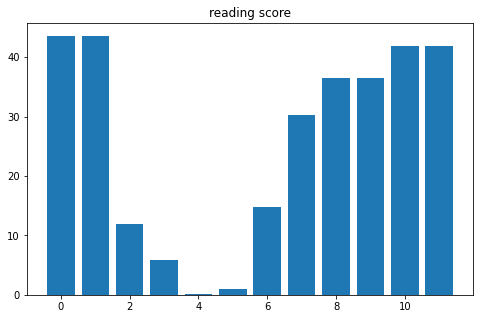

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('reading score')
plt.show()
plt.savefig('reading_score.png')

In [ ]:
data.head(1)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1


> Feature ที่ส่งผลต่อ Reading Score มากที่สุด คือ gender, test prepareation course, และ lunch ตามลำดับ

## Writing Score

### Fix y at writing score

In [ ]:
y = data['writing score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([ 6.26531106e+14,  6.26531106e+14, -8.87281430e+13, -8.87281430e+13,
       -8.87281430e+13, -8.87281430e+13, -8.87281430e+13,  2.31250000e+00,
        4.86567697e+13,  4.86567697e+13, -8.28413205e+12, -8.28413205e+12])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender_female,6.265311e+14
gender_male,6.265311e+14
race_group A,-8.872814e+13
race_group B,-8.872814e+13
race_group C,-8.872814e+13
race_group D,-8.872814e+13
race_group E,-8.872814e+13
parental level of education,2.312500e+00
lunch_free/reduced,4.865677e+13
lunch_standard,4.865677e+13


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([50.625, 57.25 , 64.125, 70.75 , 72.25 , 68.375, 56.25 , 76.75 ,
       68.75 , 61.   , 76.625, 74.125, 68.625, 69.625, 81.25 , 82.   ,
       71.   , 56.25 , 73.5  , 55.   , 79.   , 65.25 , 69.875, 69.875,
       62.   , 73.   , 68.375, 86.875, 60.75 , 66.625, 76.75 , 71.   ,
       65.375, 68.875, 63.875, 72.   , 68.625, 73.   , 54.   , 66.5  ,
       86.625, 82.   , 56.375, 76.   , 68.75 , 74.375, 76.75 , 68.75 ,
       59.5  , 56.125, 75.25 , 71.   , 65.25 , 74.625, 50.625, 60.25 ,
       73.5  , 60.625, 61.875, 80.625, 58.875, 56.125, 64.   , 69.5  ,
       86.875, 71.   , 66.875, 77.   , 72.5  , 83.   , 68.625, 74.25 ,
       67.25 , 83.   , 76.375, 58.625, 74.375, 87.625, 55.25 , 71.25 ,
       68.5  , 70.25 , 82.   , 62.625, 61.625, 52.625, 72.5  , 60.75 ,
       61.5  , 56.25 , 60.75 , 71.   , 64.625, 44.5  , 69.5  , 84.375,
       85.25 , 62.   , 83.   , 58.375, 60.5  , 68.75 , 74.875, 64.25 ,
       76.   , 78.75 , 59.75 , 58.625, 89.25 , 57.5  , 86.875, 69.5  ,
      

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

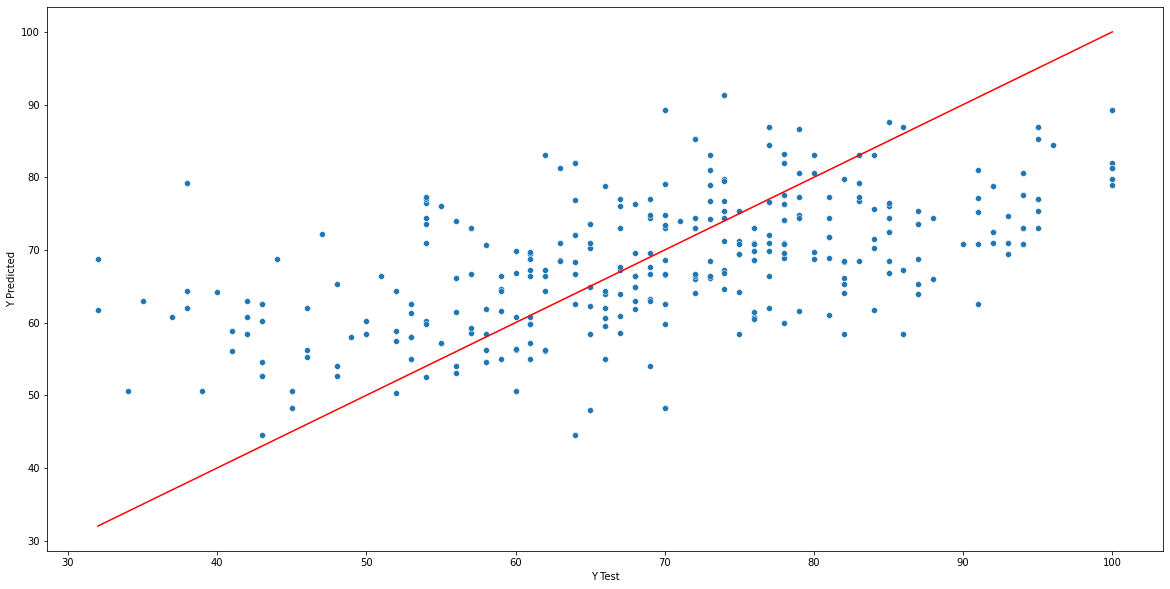

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 9.77633779264214
Mean Square Error: 151.10446279264215
Root Mean Square Error : 12.292455523313564


In [ ]:
y.describe()

count    996.000000
mean      68.052209
std       15.176393
min       10.000000
25%       57.750000
50%       69.000000
75%       79.000000
max      100.000000
Name: writing score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.3077390941693109


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean       0.970318
std       12.274643
min      -41.250000
25%       -6.000000
50%        1.625000
75%        8.750000
max       28.375000
Name: writing score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


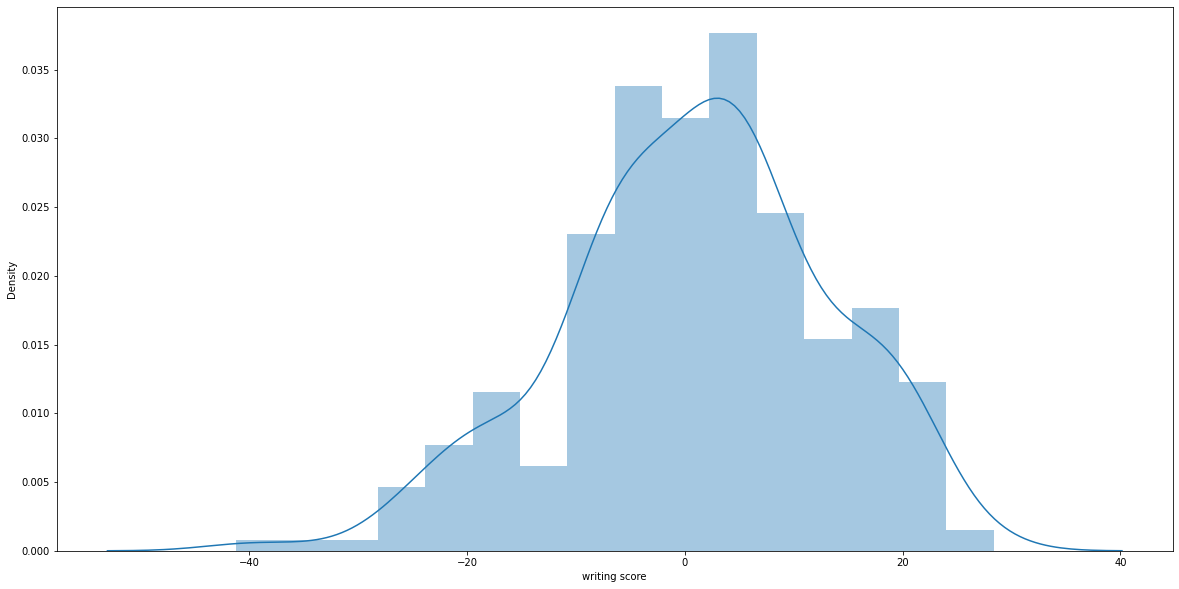

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1
1,69,90,88,82.333333,1,0,0,0,1,0,0,3,0,1,1,0
2,90,95,93,92.666667,1,0,0,1,0,0,0,6,0,1,0,1
3,47,57,44,49.333333,0,1,1,0,0,0,0,4,1,0,0,1
4,76,78,75,76.333333,0,1,0,0,1,0,0,3,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 63.644929
Feature 1: 63.644929
Feature 2: 14.934285
Feature 3: 7.818717
Feature 4: 0.001866
Feature 5: 5.908477
Feature 6: 10.833978
Feature 7: 49.672942
Feature 8: 43.139890
Feature 9: 43.139890
Feature 10: 71.750950
Feature 11: 71.750950


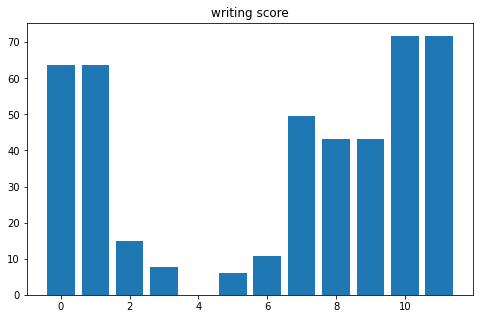

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('writing score')
plt.show()
plt.savefig('writing_score.png')

In [ ]:
data.head(1)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1


> Feature ที่ส่งผลต่อ Writing Score มากที่สุด คือ test preparetion, และ gender ตามลำดับ

## Average Score

### Fix y at average score

In [ ]:
y = data['avg_score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([ 8.36489799e+14,  8.36489799e+14, -1.18462094e+14, -1.18462094e+14,
       -1.18462094e+14, -1.18462094e+14, -1.18462094e+14,  1.93750000e+00,
        6.49622838e+13,  6.49622838e+13, -1.10602521e+13, -1.10602521e+13])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender_female,8.364898e+14
gender_male,8.364898e+14
race_group A,-1.184621e+14
race_group B,-1.184621e+14
race_group C,-1.184621e+14
race_group D,-1.184621e+14
race_group E,-1.184621e+14
parental level of education,1.937500e+00
lunch_free/reduced,6.496228e+13
lunch_standard,6.496228e+13


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([54.25 , 59.75 , 64.375, 69.875, 73.625, 70.   , 58.625, 74.625,
       68.25 , 64.75 , 76.625, 71.875, 70.25 , 70.875, 78.5  , 78.25 ,
       72.25 , 58.625, 72.875, 57.875, 76.5  , 63.5  , 73.875, 73.875,
       63.125, 73.875, 65.25 , 85.125, 64.375, 67.   , 74.625, 70.125,
       68.25 , 69.   , 64.25 , 70.75 , 66.   , 71.875, 56.75 , 69.125,
       82.125, 78.25 , 60.875, 73.5  , 71.125, 74.625, 74.625, 71.125,
       61.75 , 60.5  , 75.875, 72.25 , 63.5  , 75.625, 54.25 , 59.375,
       72.875, 59.625, 64.375, 77.375, 63.625, 60.5  , 66.375, 67.125,
       85.125, 70.125, 63.   , 77.625, 69.625, 79.375, 66.   , 72.625,
       66.   , 79.375, 73.75 , 62.75 , 72.625, 83.125, 58.125, 73.   ,
       67.875, 66.875, 78.25 , 61.25 , 62.375, 56.625, 68.875, 64.375,
       59.375, 58.625, 64.375, 68.   , 70.125, 48.125, 69.25 , 80.125,
       81.25 , 63.125, 79.375, 62.5  , 61.75 , 68.25 , 70.75 , 65.125,
       73.5  , 75.75 , 63.25 , 62.75 , 87.   , 60.125, 85.125, 69.25 ,
      

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

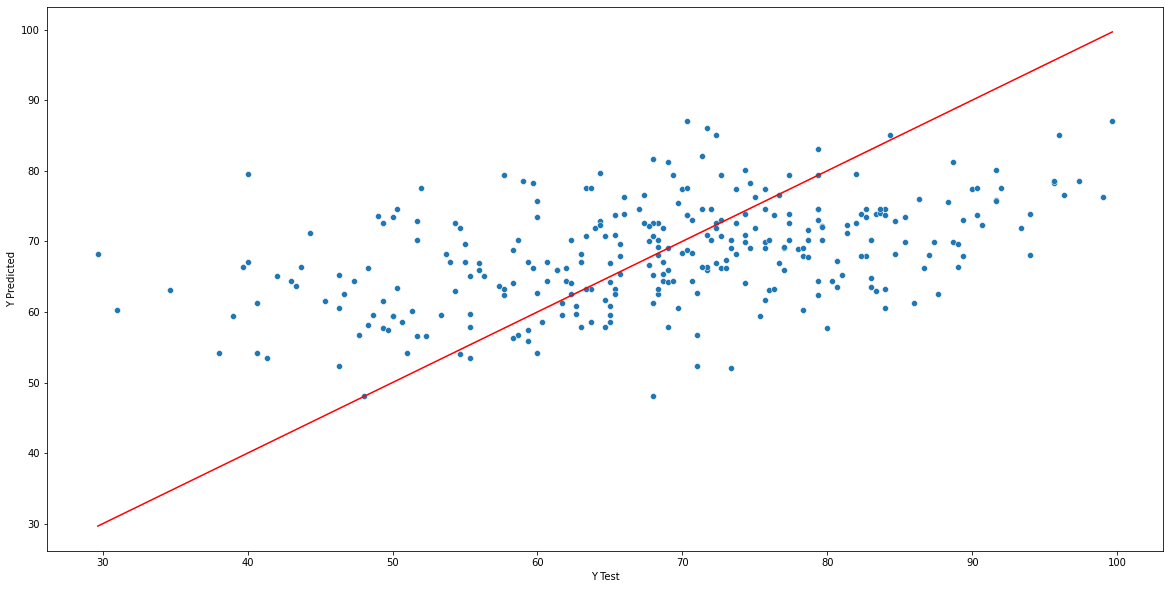

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 9.908166109253065
Mean Square Error: 152.86945489594947
Root Mean Square Error : 12.364038777678978


In [ ]:
y.describe()

count    996.000000
mean      67.776104
std       14.224983
min        9.000000
25%       58.333333
50%       68.333333
75%       77.666667
max      100.000000
Name: avg_score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.20201647979184278


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean       0.245401
std       12.382327
min      -39.500000
25%       -7.791667
50%        1.041667
75%        9.104167
max       26.000000
Name: avg_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


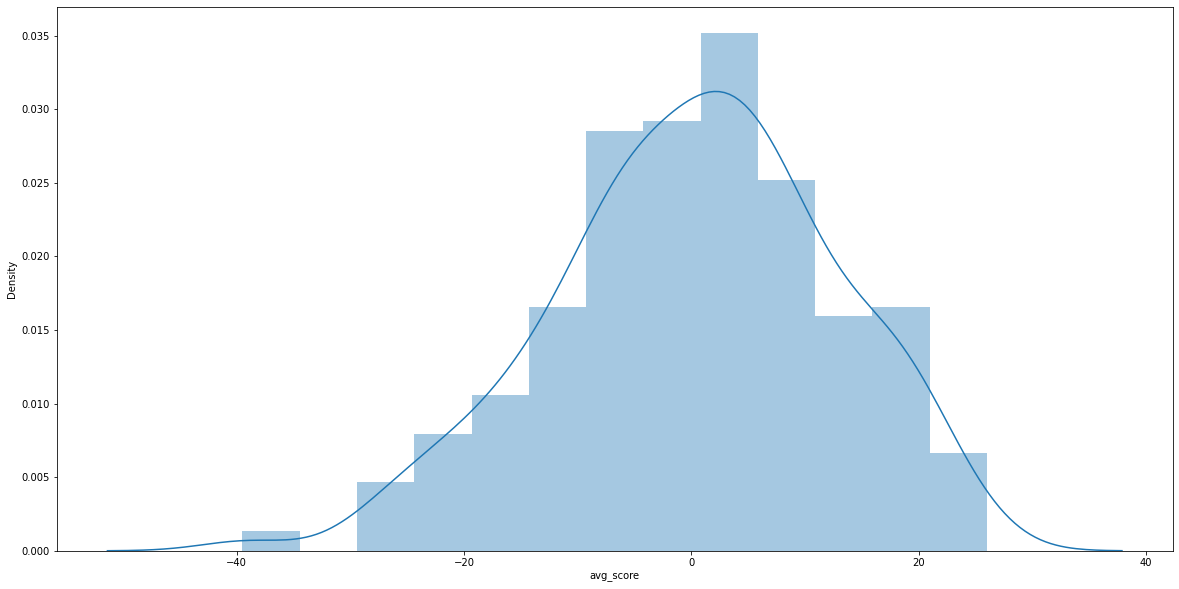

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1
1,69,90,88,82.333333,1,0,0,0,1,0,0,3,0,1,1,0
2,90,95,93,92.666667,1,0,0,1,0,0,0,6,0,1,0,1
3,47,57,44,49.333333,0,1,1,0,0,0,0,4,1,0,0,1
4,76,78,75,76.333333,0,1,0,0,1,0,0,3,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 10.280731
Feature 1: 10.280731
Feature 2: 13.763498
Feature 3: 7.818251
Feature 4: 0.176524
Feature 5: 2.684965
Feature 6: 23.563866
Feature 7: 37.768587
Feature 8: 61.343235
Feature 9: 61.343235
Feature 10: 47.556517
Feature 11: 47.556517


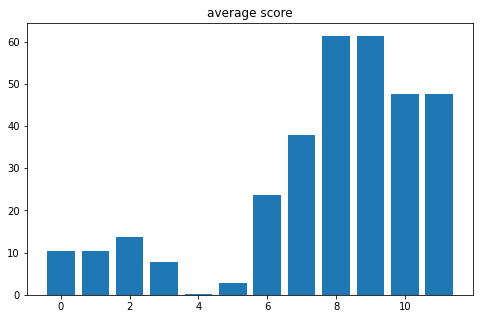

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('average score')
plt.show()
plt.savefig('avg_score.png')

In [ ]:
data.head(1)

,math score,reading score,writing score,avg_score,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,parental level of education,lunch_free/reduced,lunch_standard,test_completed,test_none
0,72,72,74,72.666667,1,0,0,1,0,0,0,5,0,1,0,1


# Answer Questions
### Objective:
**ให้สร้าง model ทำนายผลคะแนนเฉลี่ย และตอบคำถามต่อไปนี้**

## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเลขไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.181127 อยู่ในช่วง 0 <= r < 0.3
* ดังนั้น test preparation course มีความสัมพันธ์กับ math score ในระดับต่ำมาก (แทบจะไม่มีความสัมพันธ์กัน)
* จึงสรุปได้ว่า การเรียน test preparation course ไม่ส่งผลต่อผลคะแนนวิชาเลข

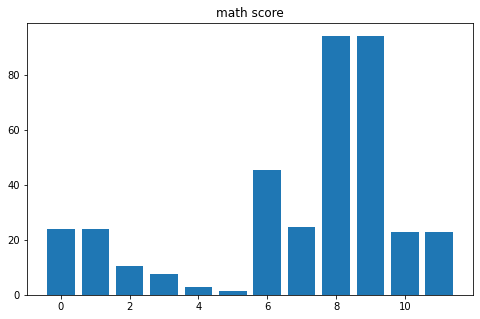

Feature ที่ส่งผลต่อ Math Score คือ lunch , race_group E และ test preparation course ตามลำดับ

In [ ]:
data[['math score', 'test_completed', 'test_none']].corr(method='spearman')

,math score,test_completed,test_none
math score,1.0000,0.1724,-0.1724
test_completed,0.1724,1.0000,-1.0000
test_none,-0.1724,-1.0000,1.0000


## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการอ่านไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.243333 อยู่ในช่วง 0 <= r < 0.3
* ดังนั้น test preparation course มีความสัมพันธ์กับ reading score ในระดับต่ำมาก (แทบจะไม่มีความสัมพันธ์กัน)
* จึงสรุปได้ว่า การเรียน test preparation course ไม่ส่งผลต่อผลคะแนนวิชาเขียน

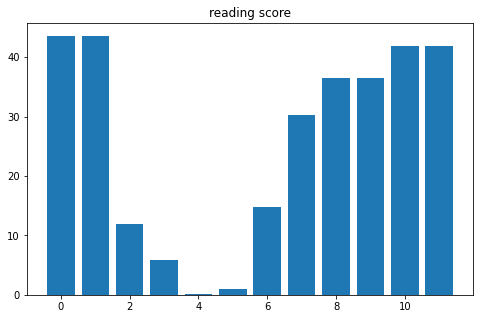

Feature ที่ส่งผลต่อ Reading Score มากที่สุด คือ gender, test prepareation course, และ lunch ตามลำดับ

In [ ]:
data[['reading score', 'test_completed', 'test_none']].corr(method='spearman')

,reading score,test_completed,test_none
reading score,1.000000,0.243954,-0.243954
test_completed,0.243954,1.000000,-1.000000
test_none,-0.243954,-1.000000,1.000000


## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการเขียนไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.313639 อยู่ในช่วง 0.3 <= r < 0.5
* ดังนั้น test preparation course มีความสัมพันธ์กับ writing score ในระดับต่ำ
* จึงสรุปได้ว่า การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเขียนน้อยมากๆ จนแทบจะไม่ส่งผล

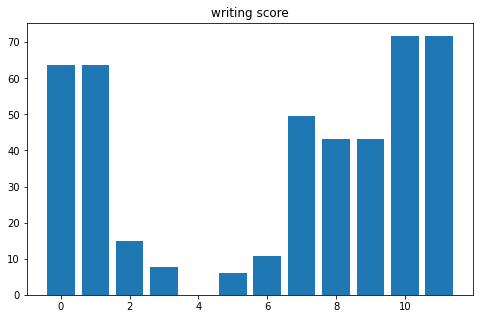

Feature ที่ส่งผลต่อ Writing Score มากที่สุด คือ test preparetion, และ gender ตามลำดับ

In [ ]:
data[['writing score', 'test_completed', 'test_none']].corr(method='spearman')

,writing score,test_completed,test_none
writing score,1.000000,0.317842,-0.317842
test_completed,0.317842,1.000000,-1.000000
test_none,-0.317842,-1.000000,1.000000


## ปัจจัย 3 ลำดับแรกที่ส่งผลต่อคะแนนเฉลี่ยของนักเรียน?

> * อันดับ 1. lunch
* อันดับ 2. test preparation course
* อันดับ 3. parental level of education

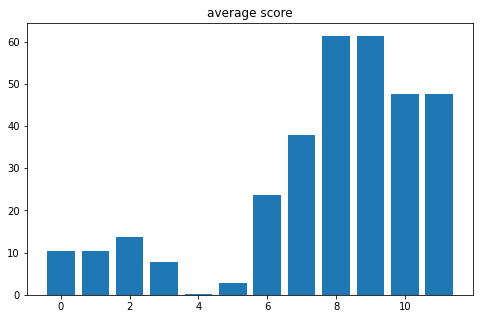